In [80]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy import integrate

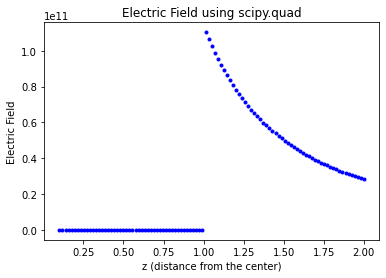

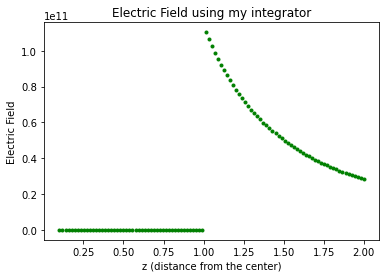

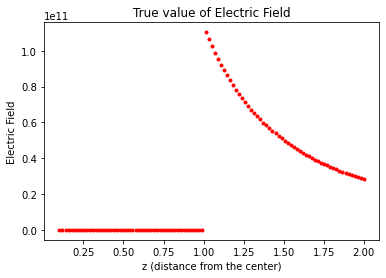

In [72]:
###Problem 1
###Setting up variables and getting true function of electric field
R=1
epsilon = 8.85418782e-12
order = 100
z=np.linspace(0.1*R, 2*R, order+1)
dz = z[1]-z[0]
###Coefficient in front of the integral, so we do not need to include it in integration, 
###but we need to include it so that the true value and expected value of integral match.
coeff = (R**2)/(2*epsilon)

def trueelec(z):
    E=[]
    for i in z:
        if i < R:
            E.append(0)
        else : 
            E.append(R**2/(epsilon*i**2))
    return E
        
E_true = trueelec(z)
##############################

###Using scipy.quad

def elec(theta, z, R=R):
    ###We assume that the charge density on the surface is 1
    top = (z-(R*np.cos(theta)))*np.sin(theta)
    bot = R**2 + z**2 - 2*R*z*np.cos(theta)
    integ = top/(bot**(3/2))
    return integ

E_scipy=[]
for i in z:
    E_scipy.append(coeff*integrate.quad(elec, 0, np.pi, (i,))[0])

###############################

###Using Legendre polynomials
def get_legendre_weights(n):
    #y=Pc - we want to pick c so that Pc goes through y
    #c = P^-1 y (if P is invertible - which it is!)
    #because we oonly care about c_0, then we only need the first
    #fow of P^-1
    x=np.linspace(-1,1,n+1)
    P=np.polynomial.legendre.legvander(x,n)
    Pinv=np.linalg.inv(P)
    coeffs=Pinv[0,:]
    #coeffs=coeffs/coeffs.sum()*n
    return coeffs*n

def my_integ(fun, z, x0, x1, tol):
    #print('integrating between ',x0,x1)
    #hardwire to use simpsons
    x=np.linspace(x0,x1,5)
    y=fun(x, z)
    dx=(x1-x0)/(len(x)-1)
    area1=2*dx*(y[0]+4*y[2]+y[4])/3 #coarse step
    area2=dx*(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/3 #finer step
    err=np.abs(area1-area2)
    if err<tol:
        return area2
    else:
        xmid=(x0+x1)/2
        left=my_integ(fun,z, x0,xmid,tol/2)
        right=my_integ(fun,z, xmid,x1,tol/2)
        return left+right
    
E_my=[]
for i in z:
    E_my.append(coeff*my_integ(elec, i, 0, np.pi, 1e-6))

##########################

###Plotting solutions

plt.plot(z, E_scipy, 'b.')
plt.title('Electric Field using scipy.quad')
plt.xlabel('z (distance from the center)')
plt.ylabel('Electric Field')
plt.show()
plt.plot(z, E_my, 'g.')
plt.title('Electric Field using my integrator')
plt.xlabel('z (distance from the center)')
plt.ylabel('Electric Field')
plt.show()
plt.plot(z, E_true, 'r.')
plt.title('True value of Electric Field')
plt.xlabel('z (distance from the center)')
plt.ylabel('Electric Field')
plt.show()

#########################

###Correct since elecric field is 0 inside hollow sphere and progressively decreasing when going outside
###There is a singularity at z = R, neither quad nor my integrator care.

In [251]:
###Problem 2
#We will be using the lorentz function and arctan to make sure our result is correct.
#I also used the builtin python function counter to figure out how many function calls
#were being done.
def lorentz(x):
    lorentz.counter +=1
    return 1/(1+x**2)
lorentz.counter=0

def integrate_adaptive(fun,x0,x1,tol, extra=None):
    print('integrating between ',x0,x1)
    #hardwire to use simpsons
    x=np.linspace(x0,x1,5)
    if extra==None:
        #We initialize extra to a list of 2 arrays
        #containing the x and y values computed so far.
        #Since extra is empty before this, we can set y to the function 
        #values of x.
        y=fun(x)
        extra=[y, x]
    else:
        #We initialize y to a list of 0's and we will change the y values
        #after.
        y=np.zeros(5)
        for i, val in enumerate(x):
            #Only extra[1] contains x values.
            for j, val2 in enumerate(extra[1]):
                if val==val2:
                    y[i] = extra[0][j]
            #We know that we cannot get a 0 value by evaluation the lorentz function
            #so any 0 still in y is a value that hasn't been found in extra. This means
            #we can change all the 0 values in y to a fun(x).
            #At the same time, we update the extra array with the newly evaluated x and y values.
        for i,val in enumerate(y):
            if val==0:
                y[i]=fun(x[i])
                np.append(extra[1], x[i])
                np.append(extra[0], y[i])
    #The rest of the function is kept the same.
    dx=(x1-x0)/(len(x)-1)
    area1=2*dx*(y[0]+4*y[2]+y[4])/3 #coarse step
    area2=dx*(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/3 #finer step
    err=np.abs(area1-area2)
    if err<tol:
        return area2
    else:
        xmid=(x0+x1)/2
        left=integrate_adaptive(fun,x0,xmid,tol/2, extra)
        right=integrate_adaptive(fun,xmid,x1,tol/2, extra)
        return left+right

x0=-100
x1=100
ans=integrate_adaptive(lorentz,x0,x1,1e-7, extra=None)
print(ans-(np.arctan(x1)-np.arctan(x0)))
print(lorentz.counter)


integrating between  -100 100
integrating between  -100 0.0
integrating between  -100 -50.0
integrating between  -100 -75.0
integrating between  -100 -87.5
integrating between  -100 -93.75
integrating between  -93.75 -87.5
integrating between  -87.5 -75.0
integrating between  -87.5 -81.25
integrating between  -81.25 -75.0
integrating between  -75.0 -50.0
integrating between  -75.0 -62.5
integrating between  -75.0 -68.75
integrating between  -68.75 -62.5
integrating between  -68.75 -65.625
integrating between  -65.625 -62.5
integrating between  -62.5 -50.0
integrating between  -62.5 -56.25
integrating between  -62.5 -59.375
integrating between  -59.375 -56.25
integrating between  -56.25 -50.0
integrating between  -56.25 -53.125
integrating between  -53.125 -50.0
integrating between  -50.0 0.0
integrating between  -50.0 -25.0
integrating between  -50.0 -37.5
integrating between  -50.0 -43.75
integrating between  -50.0 -46.875
integrating between  -46.875 -43.75
integrating between  -43.7

integrating between  -1.904296875 -1.8798828125
integrating between  -1.8798828125 -1.85546875
integrating between  -1.85546875 -1.7578125
integrating between  -1.85546875 -1.806640625
integrating between  -1.85546875 -1.8310546875
integrating between  -1.8310546875 -1.806640625
integrating between  -1.806640625 -1.7578125
integrating between  -1.806640625 -1.7822265625
integrating between  -1.7822265625 -1.7578125
integrating between  -1.7578125 -1.5625
integrating between  -1.7578125 -1.66015625
integrating between  -1.7578125 -1.708984375
integrating between  -1.7578125 -1.7333984375
integrating between  -1.7333984375 -1.708984375
integrating between  -1.708984375 -1.66015625
integrating between  -1.708984375 -1.6845703125
integrating between  -1.6845703125 -1.66015625
integrating between  -1.66015625 -1.5625
integrating between  -1.66015625 -1.611328125
integrating between  -1.66015625 -1.6357421875
integrating between  -1.6357421875 -1.611328125
integrating between  -1.611328125 -

integrating between  0.3173828125 0.341796875
integrating between  0.341796875 0.390625
integrating between  0.341796875 0.3662109375
integrating between  0.3662109375 0.390625
integrating between  0.390625 0.78125
integrating between  0.390625 0.5859375
integrating between  0.390625 0.48828125
integrating between  0.390625 0.439453125
integrating between  0.390625 0.4150390625
integrating between  0.390625 0.40283203125
integrating between  0.40283203125 0.4150390625
integrating between  0.4150390625 0.439453125
integrating between  0.4150390625 0.42724609375
integrating between  0.42724609375 0.439453125
integrating between  0.439453125 0.48828125
integrating between  0.439453125 0.4638671875
integrating between  0.439453125 0.45166015625
integrating between  0.45166015625 0.4638671875
integrating between  0.4638671875 0.48828125
integrating between  0.4638671875 0.47607421875
integrating between  0.47607421875 0.48828125
integrating between  0.48828125 0.5859375
integrating between 

integrating between  3.3203125 3.369140625
integrating between  3.369140625 3.41796875
integrating between  3.41796875 3.515625
integrating between  3.41796875 3.466796875
integrating between  3.466796875 3.515625
integrating between  3.515625 3.90625
integrating between  3.515625 3.7109375
integrating between  3.515625 3.61328125
integrating between  3.515625 3.564453125
integrating between  3.564453125 3.61328125
integrating between  3.61328125 3.7109375
integrating between  3.61328125 3.662109375
integrating between  3.662109375 3.7109375
integrating between  3.7109375 3.90625
integrating between  3.7109375 3.80859375
integrating between  3.7109375 3.759765625
integrating between  3.759765625 3.80859375
integrating between  3.80859375 3.90625
integrating between  3.80859375 3.857421875
integrating between  3.857421875 3.90625
integrating between  3.90625 4.6875
integrating between  3.90625 4.296875
integrating between  3.90625 4.1015625
integrating between  3.90625 4.00390625
integr

In [ ]:
x=np.linspace(0, 1, 5)
print(x)
y=np.array([0, 1, 2])
for i in y:
    l=np.where(x==i)
    print(l[0])


In [47]:
l=[1, 2]
x=[3]
l.append(x[0])
l

[1, 2, 3]

In [108]:
###Problem 2
def lorentz(x):
    lorentz.counter +=1
    return 1/(1+x**2)
lorentz.counter=0

def integrate_adaptive2(fun,x0,x1,tol):
    print('integrating between ',x0,x1)
    #hardwire to use simpsons
    
    x=np.linspace(x0,x1,5)
    y=fun(x)
    dx=(x1-x0)/(len(x)-1)
    area1=2*dx*(y[0]+4*y[2]+y[4])/3 #coarse step
    area2=dx*(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/3 #finer step
    err=np.abs(area1-area2)
    if err<tol:
        return area2
    else:
        xmid=(x0+x1)/2
        left=integrate_adaptive2(fun,x0,xmid,tol/2)
        right=integrate_adaptive2(fun,xmid,x1,tol/2)
        return left+right

x0=-100
x1=100
ans=integrate_adaptive2(lorentz,x0,x1,1e-7)
print(ans-(np.arctan(x1)-np.arctan(x0)))
print(lorentz.counter)



integrating between  -100 100
integrating between  -100 0.0
integrating between  -100 -50.0
integrating between  -100 -75.0
integrating between  -100 -87.5
integrating between  -100 -93.75
integrating between  -93.75 -87.5
integrating between  -87.5 -75.0
integrating between  -87.5 -81.25
integrating between  -81.25 -75.0
integrating between  -75.0 -50.0
integrating between  -75.0 -62.5
integrating between  -75.0 -68.75
integrating between  -68.75 -62.5
integrating between  -68.75 -65.625
integrating between  -65.625 -62.5
integrating between  -62.5 -50.0
integrating between  -62.5 -56.25
integrating between  -62.5 -59.375
integrating between  -59.375 -56.25
integrating between  -56.25 -50.0
integrating between  -56.25 -53.125
integrating between  -53.125 -50.0
integrating between  -50.0 0.0
integrating between  -50.0 -25.0
integrating between  -50.0 -37.5
integrating between  -50.0 -43.75
integrating between  -50.0 -46.875
integrating between  -46.875 -43.75
integrating between  -43.7

integrating between  -0.76904296875 -0.7568359375
integrating between  -0.7568359375 -0.732421875
integrating between  -0.7568359375 -0.74462890625
integrating between  -0.74462890625 -0.732421875
integrating between  -0.732421875 -0.68359375
integrating between  -0.732421875 -0.7080078125
integrating between  -0.732421875 -0.72021484375
integrating between  -0.72021484375 -0.7080078125
integrating between  -0.7080078125 -0.68359375
integrating between  -0.7080078125 -0.69580078125
integrating between  -0.69580078125 -0.68359375
integrating between  -0.68359375 -0.5859375
integrating between  -0.68359375 -0.634765625
integrating between  -0.68359375 -0.6591796875
integrating between  -0.68359375 -0.67138671875
integrating between  -0.67138671875 -0.6591796875
integrating between  -0.6591796875 -0.634765625
integrating between  -0.6591796875 -0.64697265625
integrating between  -0.64697265625 -0.634765625
integrating between  -0.634765625 -0.5859375
integrating between  -0.634765625 -0.6

integrating between  1.9287109375 1.953125
integrating between  1.953125 2.34375
integrating between  1.953125 2.1484375
integrating between  1.953125 2.05078125
integrating between  1.953125 2.001953125
integrating between  1.953125 1.9775390625
integrating between  1.9775390625 2.001953125
integrating between  2.001953125 2.05078125
integrating between  2.001953125 2.0263671875
integrating between  2.0263671875 2.05078125
integrating between  2.05078125 2.1484375
integrating between  2.05078125 2.099609375
integrating between  2.05078125 2.0751953125
integrating between  2.0751953125 2.099609375
integrating between  2.099609375 2.1484375
integrating between  2.099609375 2.1240234375
integrating between  2.1240234375 2.1484375
integrating between  2.1484375 2.34375
integrating between  2.1484375 2.24609375
integrating between  2.1484375 2.197265625
integrating between  2.197265625 2.24609375
integrating between  2.24609375 2.34375
integrating between  2.24609375 2.294921875
integratin

In [116]:
def minfunc(A, B):
    L=[]
    X=[]
    A=list(A)
    B=list(B)
    for i in A:
        for j in B:
            if i==j:
                L.append(B.index(j))
                X.append(A.index(i))
    L=list(set(L))
    newA=[]
    for i in L:
        newA.append(B[i])
    forgottenA=[]
    for i in A:
        if i not in newA:
            forgottenA.append(i)
    return list(set(X)), L, forgottenA

In [117]:
L=np.array([1,2,3,4,5,6,6,8])
X=np.array([1,111,32,49,67,6,8])

In [118]:
minfunc(L, X)

([0, 5, 7], [0, 5, 6], [2, 3, 4, 5])

In [238]:
########Problem 3
#I defined x from .5 to .999995 since the value ln(x) at 1 is 0 and was giving me problems 
#with my accuracy.
x=np.linspace(0.5, .99999995, 2000)
y=np.log2(x)
#We use a high order(200) for our Chebyshev polynomials since the coefficients that participate the 
#least wil be removed.
n=200

def mylog2(x, y, order):
    #Using frexp to decompose the x values into mantissa and exponent
    #This is used in rescaling the x values to [-1, 1] since the mantissa
    #of any number is defined on this integral. 
    mantissa, exponent = np.frexp(x)
    #We use the mantissa as our rescaled x and np.log2(m)+n as our y since 
    #x=m * 2**n.
    rescale_x = mantissa
    rescale_y = np.log2(rescale_x) + exponent
    #We also find the mantissa and exponent for e that we will use to convert
    #from log2(x) to log(x).
    emantiss, eexponent = np.frexp(np.e)
    #Get Chebyshev polynomial coefficients from rescaled x and y
    coeffs=np.polynomial.chebyshev.chebfit(rescale_x, rescale_y, order)
    #Only use the Chebyshev coefficients that give us accuracy better than 1e-6.
    #This was found to be when we removed all the coefficients lower than 1e-5, 
    #when using n as our order for the chebyshev polynomials
    coeffs[np.abs(coeffs)<1e-5] = 0
    #We know that log(x) = (n + log2(m))/(b + log2(a)) where e=a * 2**b.
    #So we use our chebyshev fit for log2 to find the values for 
    #log2(a) and log2(m), where a and m are the mantissas for x and e respectively.
    newy = np.polynomial.chebyshev.chebval(rescale_x, coeffs)
    newe = np.polynomial.chebyshev.chebval(emantiss, coeffs)
    #We determine log(x) using the formula mentionned above
    lnx = (exponent + newy)/(eexponent+newe)
    #We evaluate the accuracy as the standard deviation of the residuals
    acc=np.std(newy-y)
    return lnx, acc

my_y, acc = mylog2(x, y, n)
print("accuracy is:", acc)

accuracy is: 3.0742585714448944e-06


/opt/anaconda3/lib/python3.8/site-packages/numpy/polynomial/chebyshev.py:1673: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


accuracy is: 3.0742585714448944e-06


/opt/anaconda3/lib/python3.8/site-packages/numpy/polynomial/chebyshev.py:1673: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


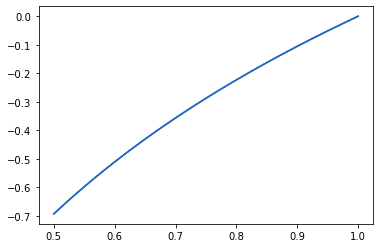

In [237]:
my_y, acc = mylog2(x, y, n)
print("accuracy is:", acc)

2.718281828459045